# Ahora resolvamos el problema de Kepler perturbado con la herramienta de `scipy`

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams.update({'font.size': 15})

## $V(r) = -\dfrac{k}{r} - \dfrac{\gamma}{r^3}$

### $mx'' = -(\dfrac{k}{r^3}+ \dfrac{3\gamma}{r^5} )* x$

### $my'' = -(\dfrac{k}{r^3} + \dfrac{3\gamma}{r^5} )* y$

<br>
<br>

#### $x' = v_x $
#### $v_x' = -(\dfrac{k}{r^3} + \dfrac{3\gamma}{r^5} )* x/m$

#### $y' = v_y$
#### $v_y' = -(\dfrac{k}{r^3} + \dfrac{3\gamma}{r^5} )* y/m$

In [32]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the kepler perturbed problem.

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,vx,vy]
        t :  time
        p :  vector of the parameters:
                  p = [m, k, gamma]
    """
    x, y, vx, vy = w
    m, k, gamma = p

    # Create f = (x',y', vx', vy'):
    f = [vx,
         vy,
         -(k/(x**2+y**2)**(3/2) + 3*gamma/(x**2+y**2)**(5/2))* x/ m,
         -(k/(x**2+y**2)**(3/2) + 3*gamma/(x**2+y**2)**(5/2))* y/ m
        ]
    return f

In [33]:
# Use ODEINT to solve the differential equations defined by the vector field
# Parametros
m = 0.5
k = 10
gamma = 0.01

# Condiciones Iniciales
l = 1
x = l**2/(k*m)
y = 0.0
vx = 0
E = -5
vy = ((2/m)*(E+k/x))**(1/2)


t = np.linspace(-20,20,1000000)
# Agrupar parametros y condiciones iniciales
p = [m, k , gamma]
w0 = [x, y, vx, vy]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,))
#              atol=abserr, rtol=relerr)

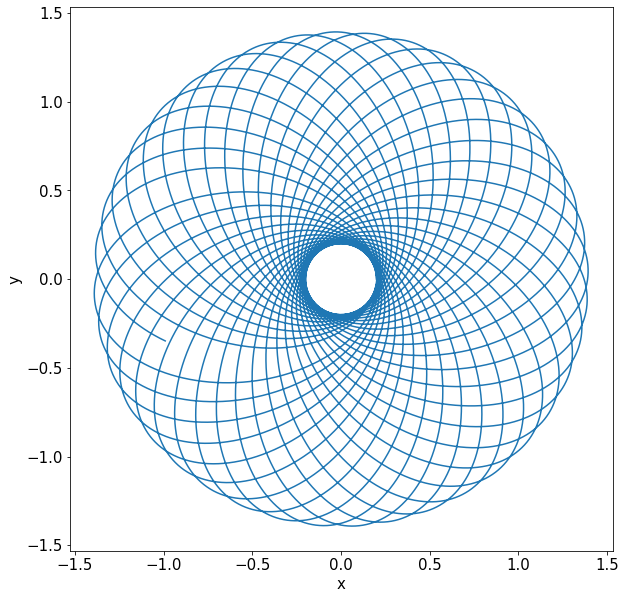

In [34]:
plt.figure(figsize=(10,10))
plt.plot(wsol[:,0], wsol[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('X-Y.png', dpi=100, bbox_inches='tight')

Text(0, 0.5, '$v_x$')

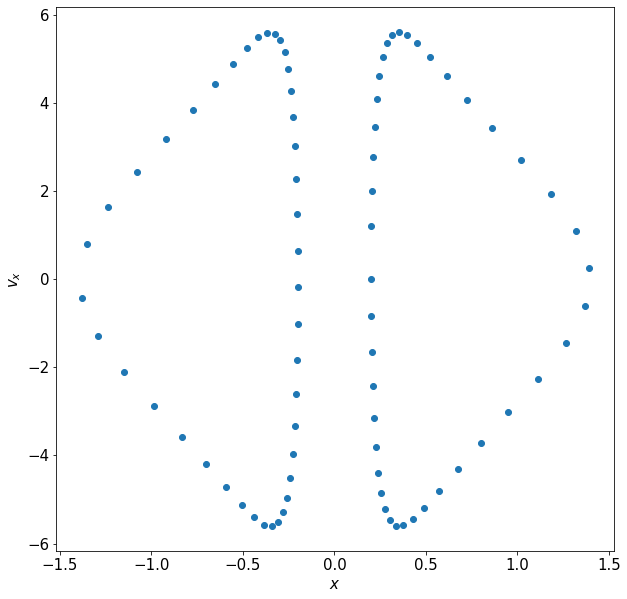

In [35]:
plt.figure(figsize=(10,10))
idx = np.argwhere(np.diff(np.sign(wsol[:,1]))).flatten()
x_values = np.array(wsol[:,0])[idx]
vx_values = np.array(wsol[:,2])[idx]
plt.scatter(x_values, vx_values)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$v_x$', fontsize=15)
#plt.savefig('X-Y.png', dpi=100, bbox_inches='tight')